In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 49.0 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO

# Check the version
print(ultralytics.__version__)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.39


In [ ]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.19
    Uninstalling albucore-0.0.19:
      Successfully uninstalled albucore-0.0.19
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to the labels folder (update this to your actual path)
labels_folder = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels'

# Function to check label format
def validate_label_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line_num, line in enumerate(lines, start=1):
            parts = line.strip().split()
            if len(parts) != 5:
                print(f"Incorrect format in {file_path}, line {line_num}: {line.strip()}")
                return False
            try:
                class_id = int(parts[0])  # Class ID must be an integer
                bbox = [float(x) for x in parts[1:]]  # Rest must be floats
                if not all(0 <= x <= 1 for x in bbox):  # Ensure bbox values are normalized
                    print(f"Out-of-range values in {file_path}, line {line_num}: {line.strip()}")
                    return False
            except ValueError:
                print(f"Non-numeric value in {file_path}, line {line_num}: {line.strip()}")
                return False
    return True

# Loop through all label files
for file_name in os.listdir(labels_folder):
    if file_name.endswith('.txt'):  # Ensure it's a label file
        file_path = os.path.join(labels_folder, file_name)
        if validate_label_file(file_path):
            print(f"File {file_name} is valid.")
        else:
            print(f"File {file_name} has errors.")


File frame_2786_jpg.rf.e5798b7bca539e34a3dc9731b71d0819.txt is valid.
File frame_1616_jpg.rf.312f54b7741ce363a046fd3a6ecdcc34.txt is valid.
File frame_1101_jpg.rf.ca6ab8d9578c9c88f5e5c2ff1f41777b.txt is valid.
File frame_1406_jpg.rf.e99483347637e93f2f45e3ac93c00d13.txt is valid.
File frame_2095_jpg.rf.71497380b9a2b6a9d5eda3d4448f1d35.txt is valid.
File frame_1008_jpg.rf.664e336ac08f9004505f38e94605ff55.txt is valid.
File frame_0435_jpg.rf.b64a627a937f4b21417074ddc983c184.txt is valid.
File frame_9538_jpg.rf.03110592999f1dbf6819eea2a816e9eb.txt is valid.
File frame_9538_jpg.rf.9216417e825af5adaee61fef78d0ac65.txt is valid.
File frame_1025_jpg.rf.cbac553f21cefa0eea05de2e394702b3.txt is valid.
File frame_5968_jpg.rf.0df1e2610361d00c9804ea25b39f36fb.txt is valid.
File frame_7577_jpg.rf.b839378e81a8d1a875a722718f1105b4.txt is valid.
File frame_1110_jpg.rf.015a371ac6969443aa3a7e8a94bbd5e4.txt is valid.
File frame_4574_jpg.rf.532ead97a5ef329a662b7a6000fb5dcc.txt is valid.
File frame_3134_jpg.

In [ ]:
# Print out class indexes and names
print(model.names)

{0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Pickup', 4: 'Truck'}


In [ ]:
# prompt: Apply augmentations to all images and then train the model

import albumentations as A
import cv2
import os

# Define your augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    # Add more augmentations as needed
])

# Path to your images and augmented images folder
images_folder = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/images' # Update this
augmented_images_folder = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/augmented_images' # Update this


# Create the augmented images folder if it doesn't exist
os.makedirs(augmented_images_folder, exist_ok=True)


for filename in os.listdir(images_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions if necessary
        img_path = os.path.join(images_folder, filename)
        img = cv2.imread(img_path)
        augmented = transform(image=img)
        augmented_img = augmented['image']
        augmented_img_path = os.path.join(augmented_images_folder, filename)
        cv2.imwrite(augmented_img_path, augmented_img)


# Now train your model using the augmented images
model = YOLO('yolov9t.pt')
model.train(
    data='/content/drive/MyDrive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml',
    epochs=100,
    batch=32,
    verbose=True,
    augment=True) # Update the path to your data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/content/drive/MyDrive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

train: Scanning /content/drive/MyDrive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels... 136 images, 2 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 203.25it/s]


train: New cache created: /content/drive/MyDrive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/valid/labels... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:03<00:00,  7.76it/s]

val: New cache created: /content/drive/MyDrive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.53G      1.471      4.259      1.107        270        640: 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         28        563    0.00147      0.124     0.0112    0.00391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.36G      1.416      3.994      1.038        173        640: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         28        563    0.00657      0.229      0.022     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.35G      1.392      3.314      0.964        230        640: 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         28        563     0.0101      0.252     0.0388     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       6.5G      1.436      2.249     0.9589        210        640: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         28        563     0.0189      0.349      0.162     0.0908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.67G      1.345      1.826     0.9568        186        640: 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         28        563      0.949     0.0607      0.183      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.49G       1.29      1.564     0.9406        228        640: 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         28        563     0.0163       0.42      0.188     0.0981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       6.3G      1.262      1.464       0.96        118        640: 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         28        563     0.0391      0.494      0.256      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.31G      1.272      1.368     0.9627        112        640: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         28        563     0.0473      0.519      0.352      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.93G      1.222      1.297     0.9398        333        640: 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         28        563     0.0491      0.501       0.38      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.03G      1.193      1.194     0.9309        205        640: 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         28        563     0.0551      0.532      0.434      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.99G      1.215      1.181     0.9457        110        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         28        563      0.888      0.245      0.447      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       6.5G      1.209      1.141     0.9274        275        640: 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         28        563       0.67      0.352      0.444      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.08G      1.224      1.092     0.9336        318        640: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         28        563      0.728      0.261      0.416      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.56G      1.183       1.08     0.9287        250        640: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         28        563      0.835      0.176      0.394       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.89G      1.185        1.1     0.9241        283        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         28        563      0.626      0.195      0.366      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.29G      1.138     0.9756     0.9136        197        640: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         28        563       0.75       0.25      0.376      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.46G      1.152      1.058     0.9266        121        640: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         28        563      0.577      0.284      0.363      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.94G      1.143      1.026     0.9278        180        640: 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         28        563      0.929      0.182      0.455      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.26G      1.154      1.002     0.9253        146        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         28        563      0.858      0.258      0.533      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.06G      1.152     0.9889     0.9338        138        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         28        563      0.861      0.224      0.517      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.58G      1.149      1.033      0.922        195        640: 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         28        563       0.83      0.333      0.553      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.63G      1.159     0.9704     0.9165        318        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         28        563      0.716      0.523      0.555      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.52G      1.106     0.9512     0.9152        136        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         28        563      0.529      0.426      0.451       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.82G      1.111     0.9219     0.9226        156        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         28        563      0.745      0.407      0.516      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.6G      1.099     0.9782      0.923        138        640: 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         28        563      0.774      0.439      0.559      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       6.5G      1.085     0.8834     0.9149        180        640: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         28        563      0.618      0.487      0.552      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.36G      1.087     0.8965     0.9192        204        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         28        563      0.671      0.501      0.601       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.57G      1.078     0.8948     0.9132        162        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         28        563      0.648      0.634      0.611      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       6.8G      1.043     0.8511     0.9137        219        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         28        563      0.632      0.587      0.607      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.71G      1.095     0.8405     0.9053        281        640: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         28        563      0.701      0.526      0.629      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.41G      1.051     0.8332     0.9151        149        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         28        563      0.729      0.615      0.665      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.71G      1.069      0.858     0.8929        318        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         28        563      0.643       0.68      0.608      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.01G      1.091     0.8375     0.9176        223        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         28        563      0.649      0.683      0.607      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.6G      1.024     0.7974     0.9117        178        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         28        563      0.675      0.614      0.638      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.37G       1.05     0.7803     0.9023        222        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         28        563      0.734      0.647      0.661      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       6.5G       1.07     0.8272     0.9063        285        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         28        563      0.726      0.617      0.642      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.79G      1.055     0.8013     0.9104        274        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         28        563      0.709      0.623      0.649      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.11G     0.9936     0.8058     0.9005        147        640: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         28        563      0.681      0.649      0.664      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.19G      1.011     0.7638     0.8908        214        640: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         28        563      0.674      0.664      0.677      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.55G     0.9886      0.774     0.9053        199        640: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         28        563       0.68      0.647      0.674      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       6.9G     0.9902     0.7785     0.8958        263        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         28        563      0.718      0.621      0.675      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.67G      1.028     0.7897      0.894        163        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         28        563      0.768      0.571      0.677      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.93G       1.02     0.7751      0.891        230        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         28        563      0.731      0.612      0.671      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.07G      1.008     0.7372     0.9057        264        640: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         28        563      0.746      0.685      0.719      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.55G      1.008     0.7616     0.8966        249        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         28        563      0.708      0.686      0.696       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.45G       1.01     0.7508     0.8933        172        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         28        563      0.763      0.662      0.682      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.27G     0.9991     0.7645     0.8929        219        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         28        563      0.735      0.665      0.698      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.88G      1.014     0.7178     0.8927        235        640: 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         28        563      0.829       0.63      0.697      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.75G     0.9607     0.7401     0.8831        177        640: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         28        563       0.74      0.714      0.703      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.84G     0.9675     0.7197      0.888        265        640: 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         28        563      0.769      0.624      0.692      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.47G     0.9775     0.7086     0.8907        234        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         28        563      0.758      0.621      0.701      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.32G     0.9497     0.7581     0.8894         75        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         28        563      0.744      0.665       0.71      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.56G      0.981     0.7135     0.9001        264        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         28        563      0.773      0.604      0.692      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.71G     0.9509      0.704     0.8861        177        640: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         28        563      0.678       0.72      0.658      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.52G     0.9436     0.7008     0.8915        124        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         28        563      0.723      0.691      0.656      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.88G     0.9914     0.7016     0.8997        218        640: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         28        563      0.764       0.68      0.688      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.79G     0.9548     0.7352     0.8983        112        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         28        563        0.8      0.708      0.715      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.32G     0.9768     0.7077     0.8967        342        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         28        563      0.817      0.701      0.737        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.52G     0.9804     0.6951     0.9023        149        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         28        563        0.8      0.706      0.729      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       6.5G     0.9289     0.6815       0.89        253        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         28        563      0.771      0.686      0.717      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.54G     0.9686     0.6764     0.8914        344        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         28        563      0.779      0.692      0.717      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.39G     0.9277     0.6596      0.878        197        640: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         28        563      0.779      0.719      0.736      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.23G     0.9098     0.6619     0.8826        207        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         28        563      0.774      0.682      0.739      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       6.7G     0.9184     0.6793      0.877        157        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         28        563      0.772       0.71      0.745      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.88G     0.8962     0.6586     0.8882        257        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         28        563       0.84      0.687      0.746      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.34G     0.9127     0.6561     0.8896        135        640: 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         28        563      0.756      0.706      0.718       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.44G     0.9097     0.6514     0.8689        269        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         28        563       0.77      0.657      0.709      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.12G     0.9277     0.6432      0.865        274        640: 100%|██████████| 5/5 [00:02<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         28        563      0.758      0.698      0.724      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.06G     0.9216     0.6573     0.8873        115        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         28        563      0.811       0.69      0.748      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.47G     0.8722     0.6504      0.886         79        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         28        563      0.799       0.68      0.745       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.93G     0.9447     0.6849     0.8829        315        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         28        563      0.788      0.697      0.757      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.28G     0.9354     0.6541     0.8737        316        640: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         28        563      0.808      0.696      0.751      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.15G     0.9275      0.627     0.8725        299        640: 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         28        563      0.823      0.676      0.752      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.34G     0.8704     0.6102     0.8689        213        640: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         28        563      0.814       0.75      0.768      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.63G     0.9233     0.6704     0.8764        222        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         28        563      0.834       0.74       0.77      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.6G     0.8888     0.6308     0.8714        180        640: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         28        563       0.83      0.723      0.765       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.29G     0.8676     0.6081      0.872        177        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         28        563      0.823      0.732      0.761      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       6.4G     0.8606     0.6249     0.8622        156        640: 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        563      0.794      0.736      0.755      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.21G     0.8941     0.6016     0.8662        244        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         28        563      0.769       0.71      0.755        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.88G     0.8862     0.6323     0.8729        302        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         28        563      0.781      0.701      0.762      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.47G     0.8691     0.5972     0.8725        167        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         28        563      0.821      0.684      0.755      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.51G      0.873     0.5907     0.8669        253        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         28        563      0.746      0.723       0.75      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.91G     0.8622     0.5888     0.8677        177        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         28        563      0.726      0.732      0.746      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.41G     0.8923     0.6003     0.8703        274        640: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         28        563      0.781      0.713      0.755      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.98G     0.8754     0.6112     0.8701        148        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         28        563      0.827      0.674      0.758      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.14G     0.8667     0.5968     0.8634        182        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         28        563      0.817      0.715       0.76      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.23G     0.8668     0.5795     0.8739        179        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         28        563      0.757      0.755      0.765      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.24G     0.8947     0.5943     0.8717        158        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        563      0.802      0.741      0.769      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       6.4G     0.8617      0.597     0.8648        274        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         28        563       0.79      0.741      0.767      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.28G     0.8766      0.651     0.8621        117        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         28        563      0.813      0.742      0.772      0.519


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.14G     0.8527      0.585     0.8658        122        640: 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         28        563      0.769      0.757      0.768      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       5.8G     0.8822     0.5808     0.8666        212        640: 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all         28        563      0.764      0.749      0.753      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.64G     0.8531     0.5641     0.8698        215        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         28        563      0.763       0.75       0.75      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       5.9G     0.8473     0.5616      0.862        124        640: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         28        563      0.769      0.733      0.769      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.95G     0.8552     0.5552     0.8594        206        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         28        563      0.789      0.728       0.77      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.84G     0.8274     0.5695     0.8574        116        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         28        563      0.806      0.743      0.774      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.89G     0.8335     0.5532     0.8617        157        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         28        563      0.805      0.742      0.776      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       5.6G     0.8353     0.5596       0.86        103        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         28        563      0.823      0.734      0.777       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.74G     0.8311     0.5449      0.857        154        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         28        563      0.822      0.727      0.776      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.83G     0.8214     0.5384     0.8484        201        640: 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         28        563      0.828      0.726      0.776      0.526



100 epochs completed in 0.108 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 4.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


                   all         28        563      0.734      0.754      0.769       0.52
                   Bus          6          6      0.694      0.833       0.74      0.561
                   Car         23        398      0.672      0.809      0.813      0.566
            Motorcycle         18         92      0.794      0.609      0.671      0.356
                Pickup         22         59      0.739      0.678      0.772      0.519
                 Truck          8          8      0.771      0.843      0.847      0.601
Speed: 0.2ms preprocess, 8.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6c03dfd090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:

model = YOLO('yolov9t.pt')
class_weights = [1.0, 5.0, 2.0, 2.0, 3.0]  # Order: Car, Bus, Motorcycle, Pickup, Truck
# classes = [0, 2, 3, 4]

results = model.train(
    data='/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml',
    epochs=200,
    batch=32,
    verbose=True,
    augment=True,
    # classes=classes,
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml, epochs=200, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=[0, 2, 3, 4], retina_masks=False, embed=None, show=False, save_frames=False, save_txt

train: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels.cache... 136 images, 2 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      5.48G       1.71      4.513      1.244         67        640: 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         28        165    0.00106      0.148     0.0124    0.00441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      5.62G      1.586      4.434      1.177         47        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165    0.00119      0.152     0.0123    0.00568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      5.63G      1.409      3.833      1.053         83        640: 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         28        165     0.0024      0.245     0.0513      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200       5.6G      1.523      3.295      1.067         48        640: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        165    0.00237      0.243     0.0449     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       5.6G      1.461      2.678      1.032         48        640: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165    0.00637      0.284      0.105     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.59G      1.408      2.489          1         63        640: 100%|██████████| 5/5 [00:02<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         28        165    0.00287      0.257      0.101     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.65G      1.371      2.377      1.036         44        640: 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         28        165     0.0034      0.313      0.127     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.64G       1.37      2.228      1.027         28        640: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         28        165    0.00616      0.354      0.155      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.59G      1.309      1.924     0.9993         98        640: 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         28        165    0.00538      0.389      0.134     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.55G      1.311      1.942      1.004         48        640: 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165    0.00667      0.446      0.169        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.62G      1.294      1.869      1.006         48        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         28        165    0.00889      0.529      0.275       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200       5.6G      1.256      1.701     0.9722         73        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165     0.0142      0.508      0.314      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200       5.5G      1.213      1.682     0.9905         73        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         28        165     0.0141      0.489      0.372      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.62G       1.28      1.722      1.002         61        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165       0.68      0.346      0.351      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.62G      1.222      1.672     0.9754         46        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        165      0.745      0.185      0.509      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.63G      1.233      1.665     0.9792         24        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         28        165       0.75      0.298      0.437       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.63G      1.283      1.683      1.017         27        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         28        165      0.762       0.11      0.517      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.56G      1.269      1.462      1.008         56        640: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.759      0.257      0.544      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       5.6G      1.273      1.484     0.9958         43        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         28        165      0.733      0.287      0.512      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.62G      1.268      1.443      1.032         48        640: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.885       0.15      0.548      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.58G      1.243      1.469     0.9978         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.847      0.421      0.559      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.64G      1.204      1.365     0.9708         77        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         28        165      0.679      0.447      0.533      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.58G      1.211      1.387     0.9992         30        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165      0.613      0.418      0.523      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      5.51G      1.283      1.449     0.9984         37        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         28        165      0.552      0.504      0.481      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      5.59G      1.172      1.354       0.99         36        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         28        165      0.566      0.516      0.487       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       5.6G      1.172      1.219      0.953         40        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165      0.548      0.499      0.513       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      5.63G      1.192      1.283     0.9784         65        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         28        165      0.656      0.528      0.554      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.65G      1.187      1.257     0.9691         47        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         28        165      0.606      0.523      0.576       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200       5.5G      1.179      1.247     0.9831         66        640: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         28        165      0.668       0.46      0.606       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.59G      1.164      1.183     0.9612         46        640: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.775      0.559      0.645      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.51G      1.165      1.154     0.9762         36        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all         28        165      0.688      0.575      0.658      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.61G      1.152      1.144     0.9593         63        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        165      0.637      0.617       0.65      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.59G      1.146      1.155     0.9698         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         28        165      0.711      0.638      0.675      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.56G      1.096      1.088     0.9425         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        165      0.796      0.457      0.615      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.64G      1.123      1.089     0.9492         53        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        165      0.586      0.626      0.616      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       5.6G      1.139      1.101     0.9398         62        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         28        165      0.656      0.552      0.608      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.65G      1.124      1.116     0.9522         54        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         28        165      0.643       0.52      0.589      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      5.59G      1.079       1.15     0.9379         38        640: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         28        165      0.737      0.598      0.626      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.63G      1.055      1.078     0.9443         47        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        165      0.831      0.637      0.704      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.62G      1.032      1.041     0.9383         58        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         28        165      0.884      0.491      0.668      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200       5.5G      1.091      1.053      0.949         64        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165      0.631      0.637      0.676      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.59G      1.083      1.071     0.9462         36        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         28        165      0.708      0.612      0.659      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.58G      1.119     0.9822     0.9378         73        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         28        165      0.785      0.586      0.653      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.59G      1.136      1.003     0.9629         65        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         28        165      0.847      0.616      0.645      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.64G      1.093     0.9727     0.9624         48        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         28        165      0.754      0.637      0.669      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.56G      1.119      1.009     0.9547         42        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         28        165      0.727      0.629      0.685      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.56G      1.077     0.9874     0.9574         49        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         28        165      0.608      0.724      0.706      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.55G      1.065     0.9397     0.9247         56        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         28        165      0.723      0.617      0.643      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.55G      1.083     0.9583     0.9464         47        640: 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         28        165      0.652      0.599       0.59      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.64G      1.054        0.9     0.9249         66        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         28        165      0.615      0.678       0.64       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.58G      1.058      0.907     0.9336         53        640: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         28        165      0.633      0.704       0.66      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.56G      1.118     0.9842     0.9511         25        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         28        165       0.73      0.555      0.593      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.58G      1.081     0.9326      0.957         54        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all         28        165       0.73      0.598      0.627      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200       5.6G      1.067     0.9294     0.9176         51        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         28        165      0.749      0.592      0.689      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.65G      1.006     0.8792     0.9221         45        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         28        165      0.675      0.674      0.712      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.56G      1.005     0.8558     0.9309         46        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        165      0.775      0.622      0.672       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.59G      1.033     0.9295     0.9546         20        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         28        165      0.746      0.639      0.715      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      5.57G      1.037     0.8626     0.9353         81        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         28        165      0.766      0.711      0.749      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.63G      1.075     0.8466     0.9417         44        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         28        165      0.736      0.712      0.729      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.57G       1.04       0.88     0.9555         69        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         28        165      0.683      0.688      0.727      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.59G      1.036     0.8428     0.9229         79        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        165      0.831      0.616       0.73      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.61G      1.011     0.8237     0.9217         47        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        165      0.715      0.679      0.723       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.63G     0.9819     0.8171     0.9236         58        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165       0.72      0.658      0.696      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.62G      1.068     0.8853     0.9084         33        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         28        165      0.751      0.697      0.725      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.56G     0.9648     0.7914     0.9389         51        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        165      0.832      0.642      0.711      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.57G      0.965     0.8175     0.9302         41        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         28        165       0.77      0.668      0.692      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.55G      0.998     0.8352     0.9089         61        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         28        165      0.711      0.666      0.705      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      5.57G     0.9851     0.8186     0.9088         62        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         28        165      0.767      0.688      0.715      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.66G     0.9989     0.7737     0.9364         40        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         28        165       0.75      0.648      0.691      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.61G     0.9872     0.8437      0.935         16        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         28        165      0.718      0.686      0.701      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.58G      1.076     0.8258       0.93         82        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         28        165      0.731      0.697      0.739      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200       5.6G     0.9594     0.7984     0.9186         83        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         28        165      0.728      0.684      0.725       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.61G     0.9821     0.7795     0.9085         70        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        165      0.743      0.695      0.717      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.64G     0.9352     0.7687     0.8936         45        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        165      0.798      0.624       0.73      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.55G     0.9695     0.7878     0.9186         65        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         28        165      0.672      0.704      0.727      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.55G     0.9386      0.755     0.9063         58        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         28        165      0.804      0.609      0.741      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.59G     0.9446     0.7728     0.9109         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         28        165      0.724      0.706      0.725      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.65G     0.9289     0.7593     0.8975         49        640: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         28        165      0.671      0.631      0.696      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.64G      1.002     0.7718     0.9068         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         28        165      0.625      0.737      0.709      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.55G     0.9095     0.7652      0.899         96        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        165      0.833      0.664      0.741      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.64G     0.9459     0.7317     0.8958         45        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         28        165      0.814      0.655      0.717      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.63G     0.9885     0.7499     0.9087         63        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         28        165      0.749      0.728       0.71      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.67G     0.9265     0.7702      0.889         34        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         28        165      0.845      0.695      0.726      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.59G     0.9485     0.7095     0.9213         85        640: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         28        165      0.782      0.698      0.722      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.58G      0.945     0.7497     0.9143         57        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         28        165      0.733      0.717      0.709      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.59G     0.9611     0.7029     0.8801         53        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         28        165      0.792      0.722       0.73      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.58G     0.9178     0.6852     0.9108         48        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         28        165      0.749      0.744      0.722      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.61G     0.9108     0.7243      0.904         44        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         28        165      0.752      0.712      0.704       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      5.57G     0.9527     0.7341     0.9148         79        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        165      0.704      0.735      0.749      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.67G     0.9641     0.8001       0.93         24        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        165      0.862      0.632      0.749      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.57G     0.9635     0.7958     0.9143         40        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.828      0.645      0.742      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200       5.6G     0.8732     0.6955     0.9067         34        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         28        165      0.767      0.663      0.737      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.56G      0.914     0.6847     0.9083         72        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         28        165      0.835      0.635      0.747      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.58G      0.945     0.7208     0.8948         88        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         28        165      0.812      0.693      0.747      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.59G     0.9674     0.7342     0.8942         72        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         28        165      0.717      0.712      0.737      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.66G     0.9752     0.7608     0.9309         24        640: 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         28        165      0.631      0.711      0.723      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.61G     0.9833     0.7324     0.9116         60        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         28        165      0.703       0.73      0.749      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.59G     0.9468     0.7537     0.9087         85        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         28        165      0.736      0.739      0.759      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.62G     0.9304     0.7134     0.8999         72        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.714      0.763      0.765      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.66G     0.9078      0.681     0.8757         85        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         28        165      0.883       0.61      0.777      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.65G     0.8546     0.6786     0.9028         21        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         28        165       0.74      0.715      0.744      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      5.65G     0.8946     0.6698      0.886         57        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         28        165      0.786      0.643      0.739      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      5.62G     0.9172     0.6771     0.8919         60        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         28        165      0.772       0.66      0.734      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      5.59G     0.8989     0.6573     0.9103         34        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         28        165      0.734      0.727      0.705      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.56G     0.9118      0.696     0.8997         45        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         28        165      0.788      0.703      0.711      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      5.59G     0.9014     0.6406     0.8886         65        640: 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        165      0.867      0.669      0.755      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      5.61G     0.8771     0.6613     0.8779         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.831      0.672      0.739      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       5.6G     0.9378     0.6555     0.9035         68        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         28        165      0.796      0.686      0.752       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.62G     0.8691     0.6657     0.8852         88        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.828      0.718      0.745      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.58G       0.88     0.6601     0.8808         47        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         28        165      0.787      0.703      0.718       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      5.63G     0.9024     0.6983     0.8868         48        640: 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        165      0.785      0.699      0.706      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.61G     0.8686     0.6541     0.8789         57        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         28        165      0.808      0.699      0.738      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      5.63G      0.865     0.6368     0.8931         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         28        165      0.807      0.721       0.75      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      5.61G     0.8615     0.6223     0.8928         52        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         28        165      0.774      0.699      0.748      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      5.58G     0.8913     0.6494     0.8636         56        640: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         28        165      0.822      0.697      0.747      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      5.64G     0.8431     0.6093     0.8795         27        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         28        165      0.777       0.69      0.721      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      5.57G     0.8593     0.6638     0.8944         27        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.746      0.734      0.707       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      5.61G     0.9215     0.6467      0.881         46        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         28        165      0.705      0.759      0.723      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      5.61G     0.9177     0.7038      0.911         27        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         28        165      0.752      0.732      0.716      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.58G     0.8495     0.6211     0.8981         68        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         28        165      0.781       0.72      0.732      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      5.63G     0.8847     0.6587     0.8902         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         28        165      0.769      0.751      0.723      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.62G     0.7776      0.588     0.8609         58        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        165      0.765      0.724      0.732      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.66G     0.8343     0.6295     0.9028         45        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         28        165      0.758      0.704      0.729      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200       5.5G      0.823     0.5801     0.8853         44        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         28        165      0.778      0.712      0.735      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      5.62G     0.8762     0.6113     0.8898         81        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         28        165      0.789      0.691       0.72      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      5.61G     0.8878     0.6238     0.8883         49        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         28        165       0.72      0.706      0.723      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      5.62G     0.8401     0.6007     0.9083         38        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         28        165      0.701      0.746      0.726      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      5.62G     0.8677     0.5997     0.8856         44        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         28        165      0.718      0.727      0.734      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      5.62G     0.8233     0.5787     0.8615         50        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         28        165       0.73      0.695      0.729      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200       5.6G     0.8265     0.5718     0.8832         50        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         28        165      0.811      0.662      0.737       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      5.58G      0.837     0.5812     0.8803         84        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         28        165       0.78      0.702       0.74      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      5.62G     0.8134     0.5934     0.8634         45        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         28        165       0.78      0.704       0.76      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      5.58G     0.8146     0.5746     0.8831         72        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         28        165      0.798      0.684      0.758      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      5.58G     0.8027      0.551     0.8752         51        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.863      0.681      0.771       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      5.48G     0.8463     0.5932     0.8793         65        640: 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        165      0.808       0.67       0.77      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      5.57G     0.8926     0.6102     0.8824         68        640: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         28        165      0.832      0.675      0.766      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      5.58G     0.7779     0.5818     0.8734         36        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         28        165      0.789      0.678      0.743      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      5.58G     0.8269     0.5806     0.8708         42        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         28        165       0.73      0.756      0.752      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      5.56G     0.8117      0.577     0.8738         57        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         28        165      0.709      0.762       0.75      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      5.63G     0.8076     0.5761     0.8679         69        640: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         28        165      0.768      0.726      0.756       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      5.55G     0.8107     0.5974     0.8981         95        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         28        165      0.809      0.722      0.758        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      5.57G     0.8367     0.5904     0.8742         41        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         28        165      0.787      0.686      0.756      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      5.56G     0.7693     0.5647     0.8901         52        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


                   all         28        165      0.803      0.641      0.738      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      5.56G     0.7814     0.5725     0.8856         62        640: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         28        165      0.802       0.65      0.731       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      5.51G     0.7437     0.5447     0.8484         26        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         28        165      0.785      0.663      0.737      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      5.56G     0.7947     0.5681     0.8655         68        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         28        165      0.748      0.745      0.747      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      5.56G     0.8132     0.5707     0.8821         49        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         28        165      0.777      0.739      0.744       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200       5.6G     0.8135      0.574     0.8784         66        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         28        165      0.779      0.758      0.742      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      5.58G     0.8375     0.5919      0.877         36        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.793      0.738       0.73      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200       5.6G     0.7867     0.5329     0.8763         67        640: 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         28        165      0.759      0.711      0.736      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      5.61G     0.7747     0.5662     0.8777         60        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         28        165      0.748      0.705      0.736      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      5.56G     0.8132     0.5658     0.8601        109        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         28        165      0.779      0.701      0.739      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.55G     0.7685     0.5441     0.8661         46        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         28        165      0.785      0.703      0.742      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.62G     0.7202     0.5219     0.8552         54        640: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         28        165      0.773      0.717      0.751      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      5.62G     0.7598     0.5878     0.8535         38        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         28        165       0.74      0.738      0.749      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.61G      0.819     0.5507     0.8585         67        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         28        165      0.773      0.737      0.753      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.57G     0.7579     0.5368     0.8565         37        640: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         28        165      0.766      0.751      0.748      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.62G     0.7439     0.5526     0.8666         40        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         28        165      0.754      0.761      0.748      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.61G     0.7282     0.5353     0.8385        105        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         28        165      0.738      0.765      0.752      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      5.56G     0.7737      0.548       0.87         48        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         28        165      0.744      0.756      0.751        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      5.65G     0.7273     0.4979      0.852         40        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         28        165      0.819      0.698      0.748      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      5.59G     0.7445     0.5374     0.8574         47        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         28        165      0.788      0.736      0.757      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200       5.6G     0.7181     0.5283     0.8624         46        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        165      0.794      0.742      0.761      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      5.61G      0.777     0.5458     0.8569         61        640: 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         28        165      0.757       0.72      0.746      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.62G     0.7635     0.5377     0.8642         35        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         28        165      0.734      0.737      0.749      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      5.64G     0.7156     0.5141     0.8593         42        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         28        165      0.736      0.718      0.741      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      5.59G     0.7645     0.5276     0.8652         47        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         28        165      0.738      0.726       0.74      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      5.61G     0.7592     0.5161     0.8541         46        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         28        165      0.712      0.757      0.729      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.59G     0.6716     0.4919     0.8573         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         28        165      0.753      0.738       0.75      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      5.65G     0.7657     0.5344     0.8506         64        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         28        165      0.802      0.702      0.754      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.59G     0.7586     0.5132     0.8963         38        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        165      0.762      0.732      0.749      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200       5.6G     0.7933     0.5224     0.8417         52        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.741       0.74      0.746      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      5.58G     0.7646     0.5361     0.8464         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.758      0.741      0.738      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      5.58G     0.7164     0.5111     0.8528         57        640: 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         28        165      0.756       0.75      0.742      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       5.6G     0.7612     0.5575     0.8587         51        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         28        165      0.765      0.744      0.756      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      5.56G     0.7409     0.5118     0.8542         47        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         28        165      0.744      0.748      0.756      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      5.55G     0.7448      0.511     0.8603         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         28        165      0.734      0.741      0.758      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      5.61G     0.7393     0.5111       0.86         50        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         28        165      0.776      0.731      0.757      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.57G     0.7453     0.5079     0.8521         60        640: 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         28        165      0.788      0.721      0.772      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.58G      0.745     0.5127     0.8519         42        640: 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         28        165      0.777      0.746      0.757      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.62G     0.7533     0.5052     0.8544         55        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         28        165      0.764      0.759      0.757      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      5.66G     0.7561     0.5264     0.8602         68        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         28        165      0.801      0.735      0.775      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      5.58G     0.7524     0.5143     0.8524         85        640: 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         28        165      0.803      0.735      0.775      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.62G     0.7188     0.5024     0.8412         39        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         28        165      0.748      0.761      0.763      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.55G     0.7003     0.4663     0.8448         79        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         28        165      0.788      0.707      0.752      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.63G     0.6992     0.4899     0.8571         56        640: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        165      0.789      0.705      0.759      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.56G     0.6871     0.4695     0.8412         33        640: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         28        165      0.743      0.755       0.76      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.59G     0.6846     0.4927      0.864         53        640: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         28        165      0.769      0.747      0.761      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      5.57G     0.6558     0.4717     0.8478         40        640: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        165      0.768      0.754       0.76      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      5.61G     0.7317      0.516     0.8605         47        640: 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         28        165      0.766      0.749      0.754      0.487


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.56G     0.7532     0.4971      0.872         50        640: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         28        165      0.769      0.747      0.754       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200       5.5G     0.7083     0.5002     0.8487         28        640: 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         28        165      0.737      0.729       0.75      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.53G     0.6756     0.4616     0.8426         35        640: 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         28        165      0.771       0.71      0.749       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      5.55G      0.695     0.5291     0.8391         34        640: 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         28        165      0.753      0.726      0.751      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.56G     0.7046     0.4989     0.8402         29        640: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         28        165      0.753      0.727      0.759      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.55G     0.6855     0.4793     0.8555         32        640: 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         28        165      0.773      0.765       0.76      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       5.5G     0.7107     0.4939     0.8448         26        640: 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        165      0.774      0.764       0.76      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      5.51G     0.7032     0.4784      0.832         43        640: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         28        165      0.774      0.758      0.763      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.55G     0.6639     0.4886     0.8318         25        640: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         28        165      0.779      0.759      0.764      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      5.55G     0.7167     0.4893     0.8407         52        640: 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         28        165      0.779      0.761      0.763        0.5



200 epochs completed in 0.206 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 4.7MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 4.7MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


                   all         28        165      0.768      0.751      0.758      0.498
                   Bus          6          6      0.696      0.833      0.731      0.561
            Motorcycle         18         92      0.843      0.642      0.735      0.374
                Pickup         22         59      0.836      0.661      0.763      0.523
                 Truck          8          8      0.698      0.867      0.802      0.534
Speed: 0.2ms preprocess, 8.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
# Path to the directory where YOLO saves training outputs
runs_path = '/content/runs/detect'

# Find the most recent training directory
latest_run = max([os.path.join(runs_path, d) for d in os.listdir(runs_path)], key=os.path.getmtime)

# Path to the best weights file
best_weights_path = os.path.join(latest_run, 'weights', 'best.pt')

# Load the model with the found best weights
model = YOLO(best_weights_path)

print(f"Loaded model from: {best_weights_path}")

metrics = model.val(
    data='/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml',
    split='test'
)

# Print evaluation metrics
print(metrics)

Loaded model from: /content/runs/detect/train3/weights/best.pt
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


val: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


                   all         13        254       0.72      0.523      0.557      0.394
                   Bus          5          5      0.914        0.4      0.404      0.262
                   Car         12        179      0.662      0.832      0.808      0.587
            Motorcycle          8         38       0.76      0.499      0.517      0.303
                Pickup          8         29      0.774      0.552      0.716      0.511
                 Truck          3          3      0.492      0.333      0.339      0.305
Speed: 0.3ms preprocess, 7.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6baff568c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results

In [ ]:
print(vars(metrics))  # Lists the object's attributes and their values


{'save_dir': PosixPath('runs/detect/val2'), 'plot': True, 'on_plot': <bound method BaseValidator.on_plot of <ultralytics.models.yolo.detect.val.DetectionValidator object at 0x7c6c036a13f0>>, 'names': {0: 'Bus', 1: 'Car', 2: 'Motorcycle', 3: 'Pickup', 4: 'Truck'}, 'box': ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[    0.40371,     0.40371,     0.40371,     0.40371,     0.40371,     0.20079,     0.20079,     0.20079,           0,           0],
       [    0.80778,     0.80155,     0.79163,     0.77363,     0.75227,     0.72508,     0.61165,     0.42773,     0.17554,   0.0073218],
       [    0.51661,     0.51661,     0.51661,     0.48261,     0.42734,     0.24646,     0.21399,     0.10879,   0.0046419,           0],
       [    0.71552,     0.70712,     0.70712,     0.70712,     0.68765,     0.54655,     0.46415,     0.32107,     0.23203,    0.017291],
       [    0.33949,     0.33949,     0.33949,     0.33949,     0.33949,     0.33949,     0.33949,     0.33

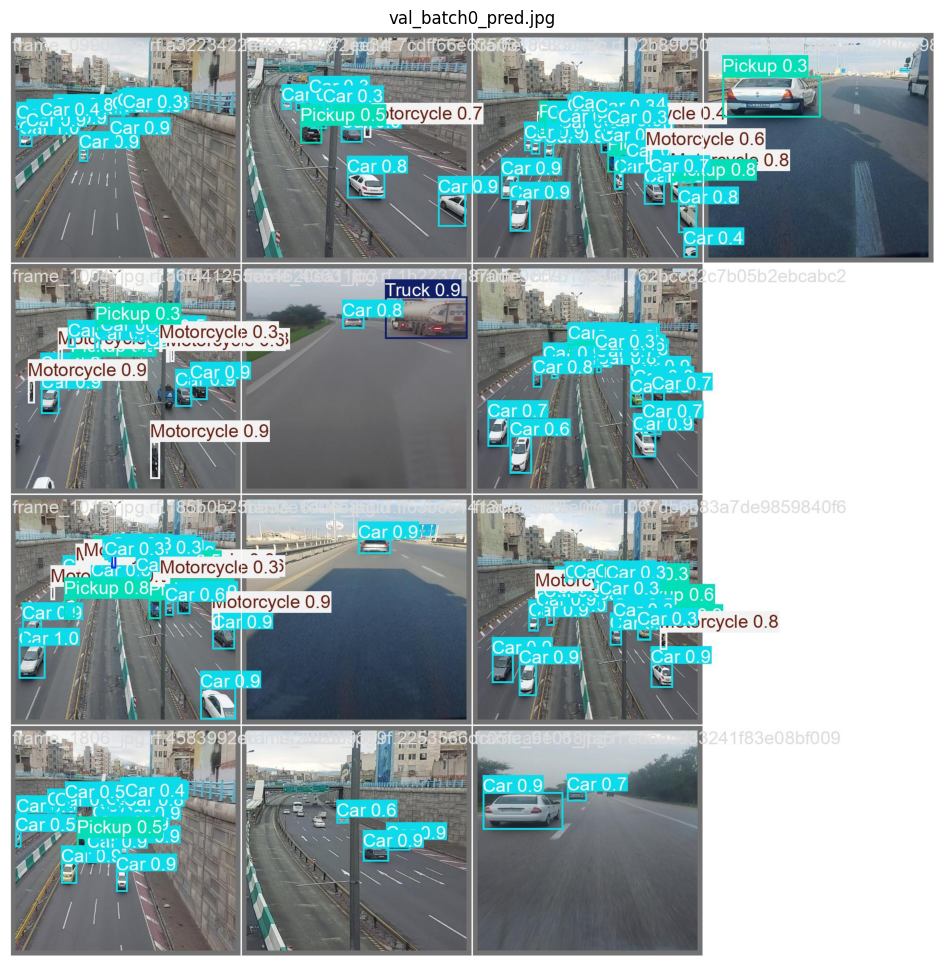

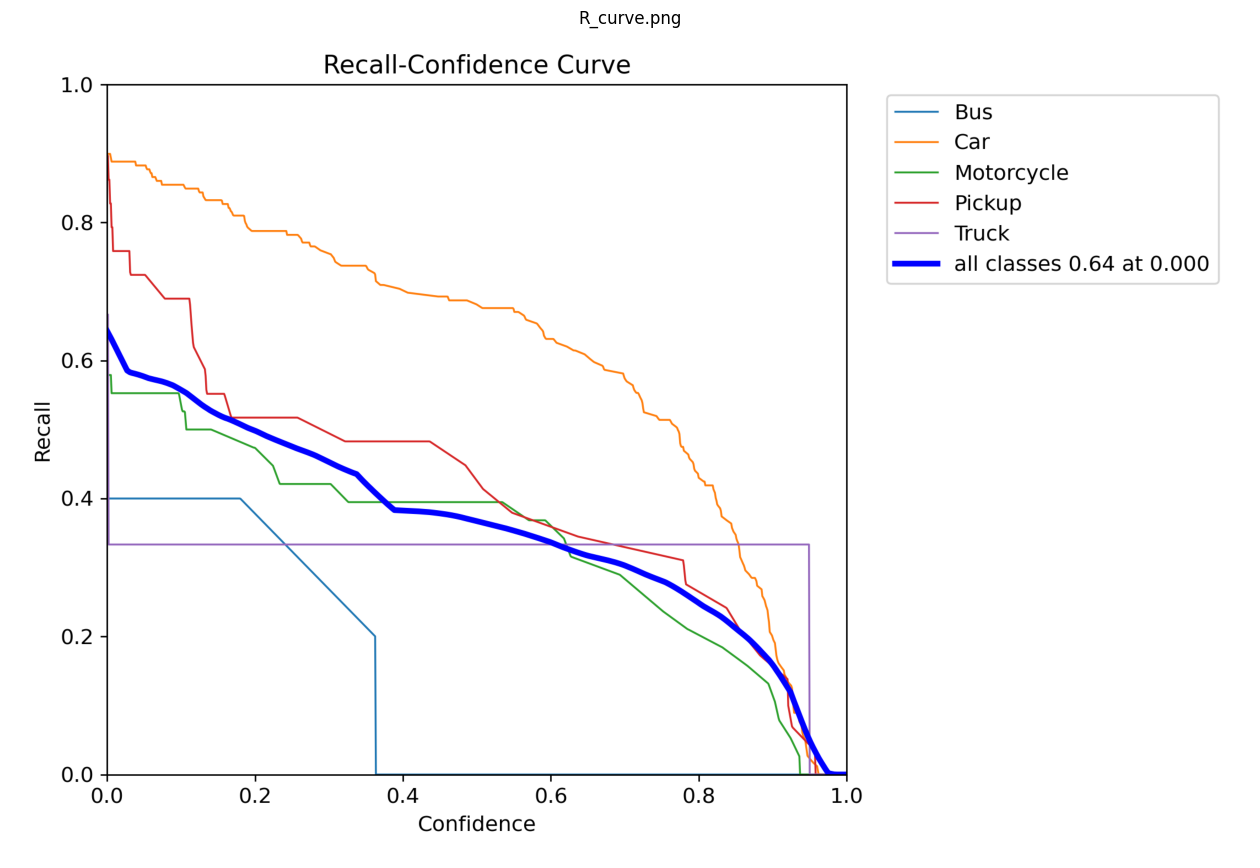

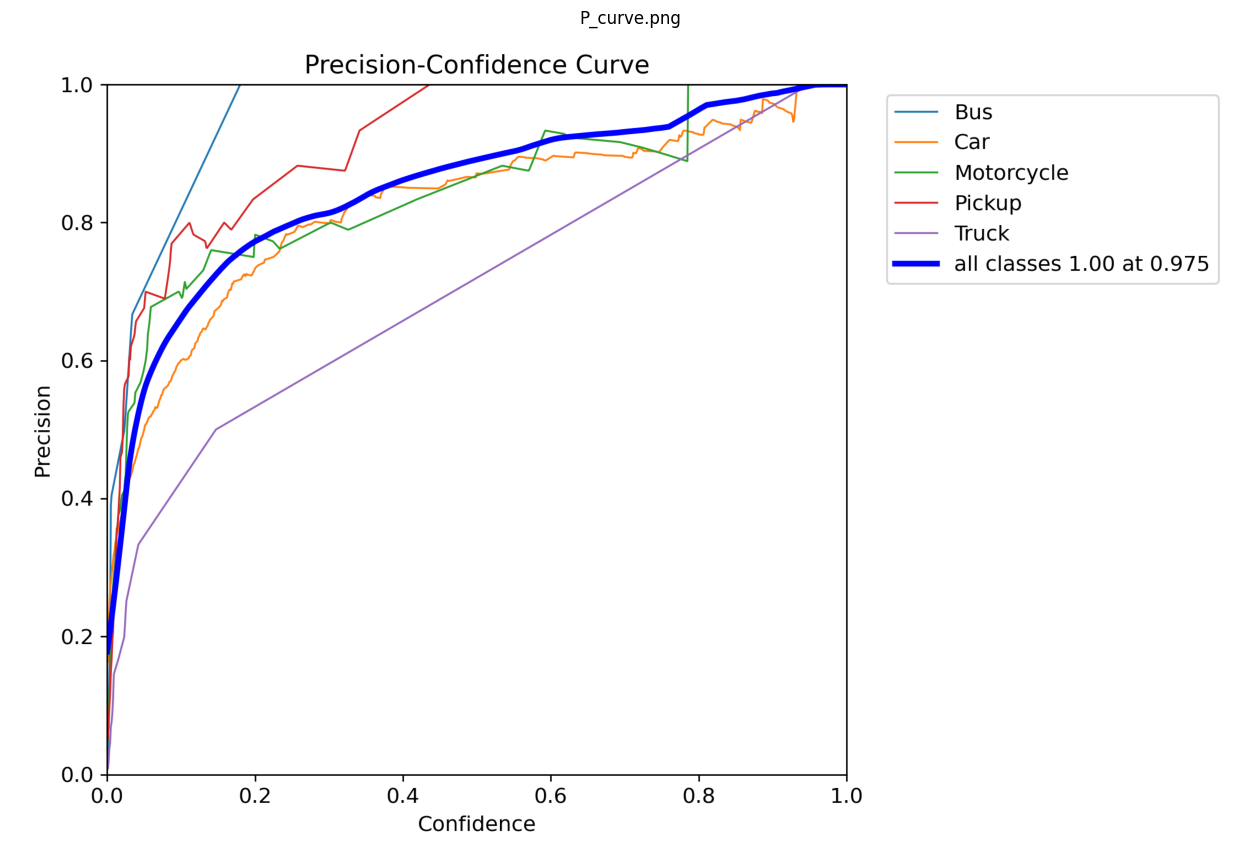

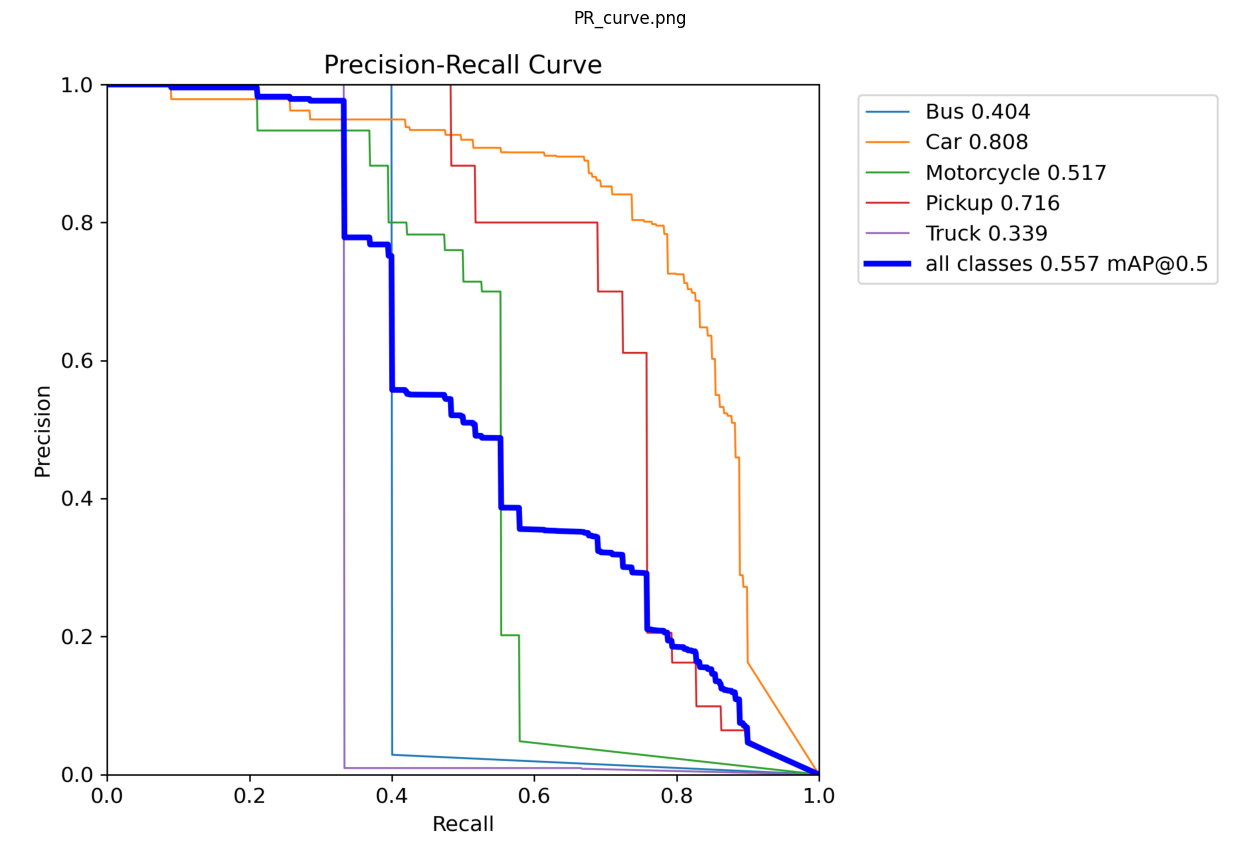

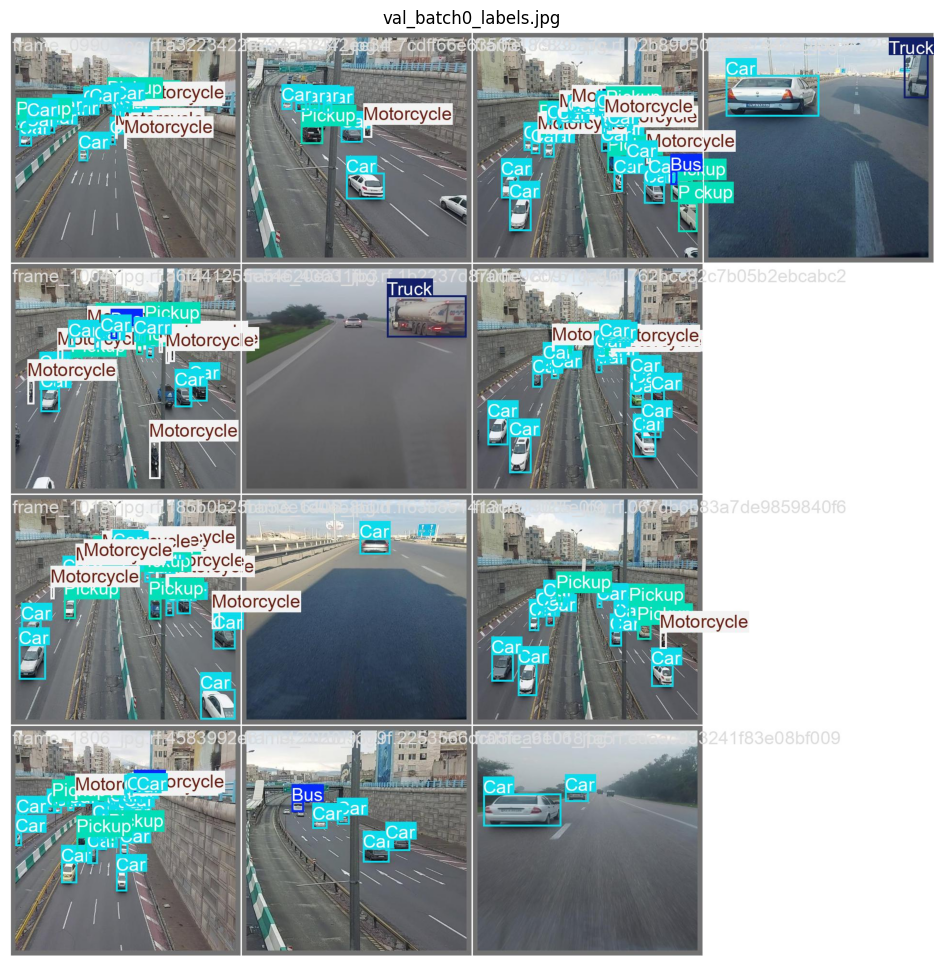

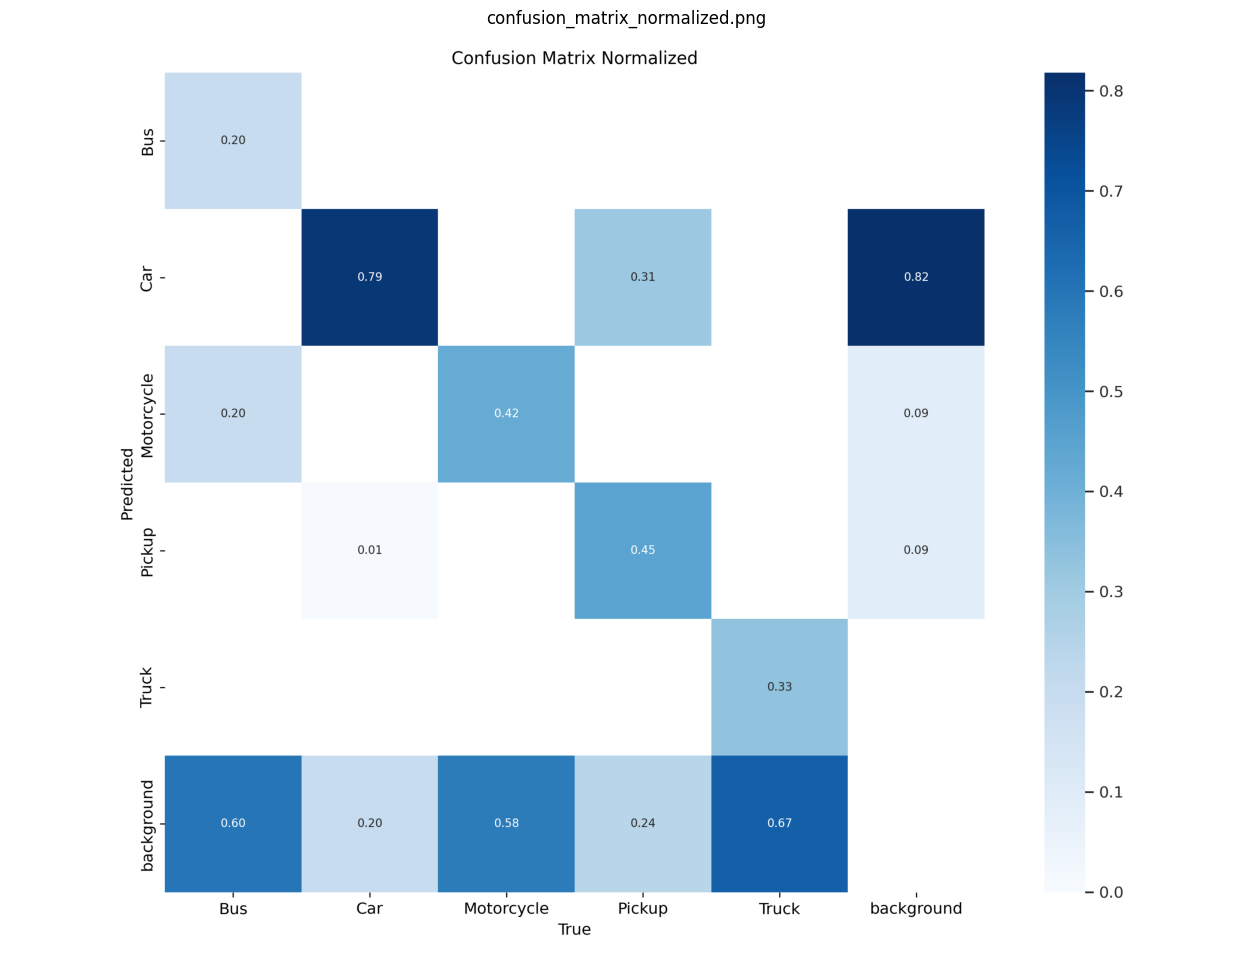

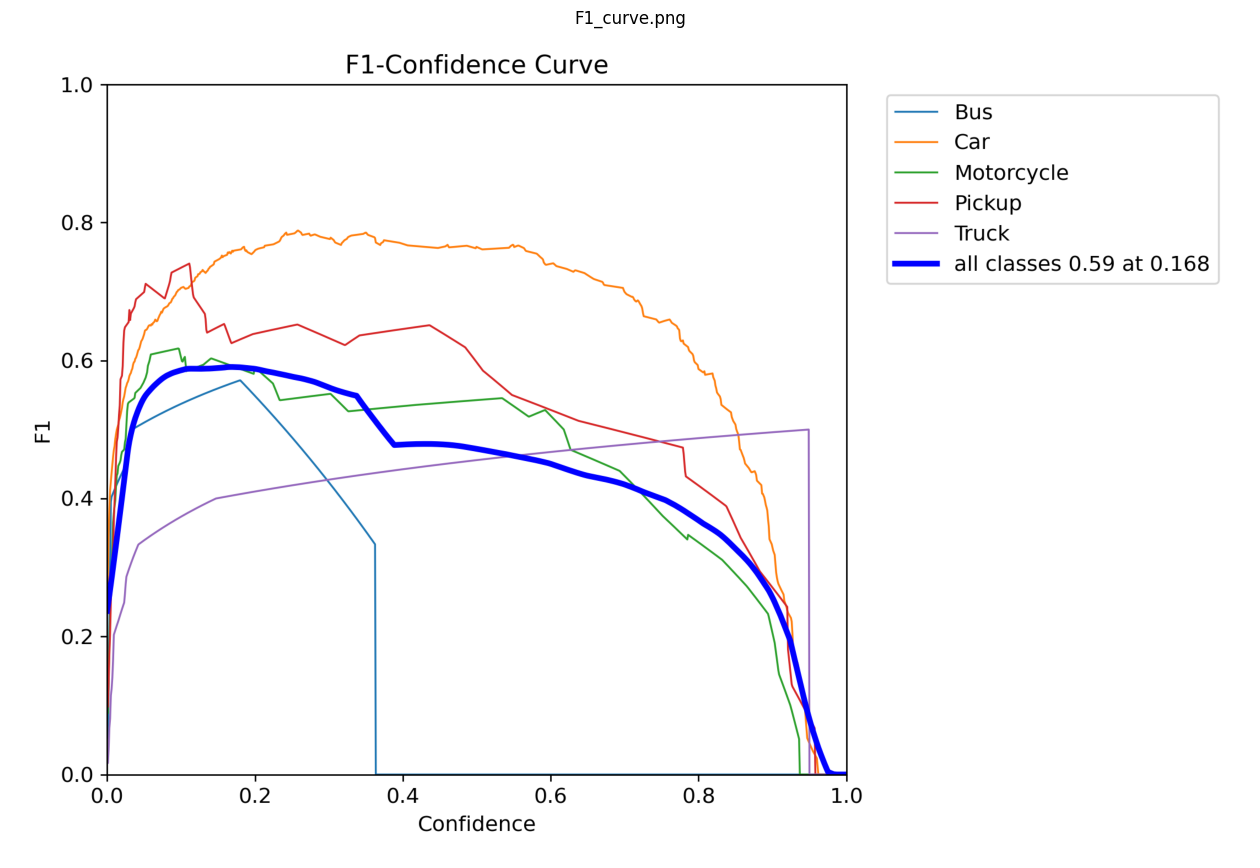

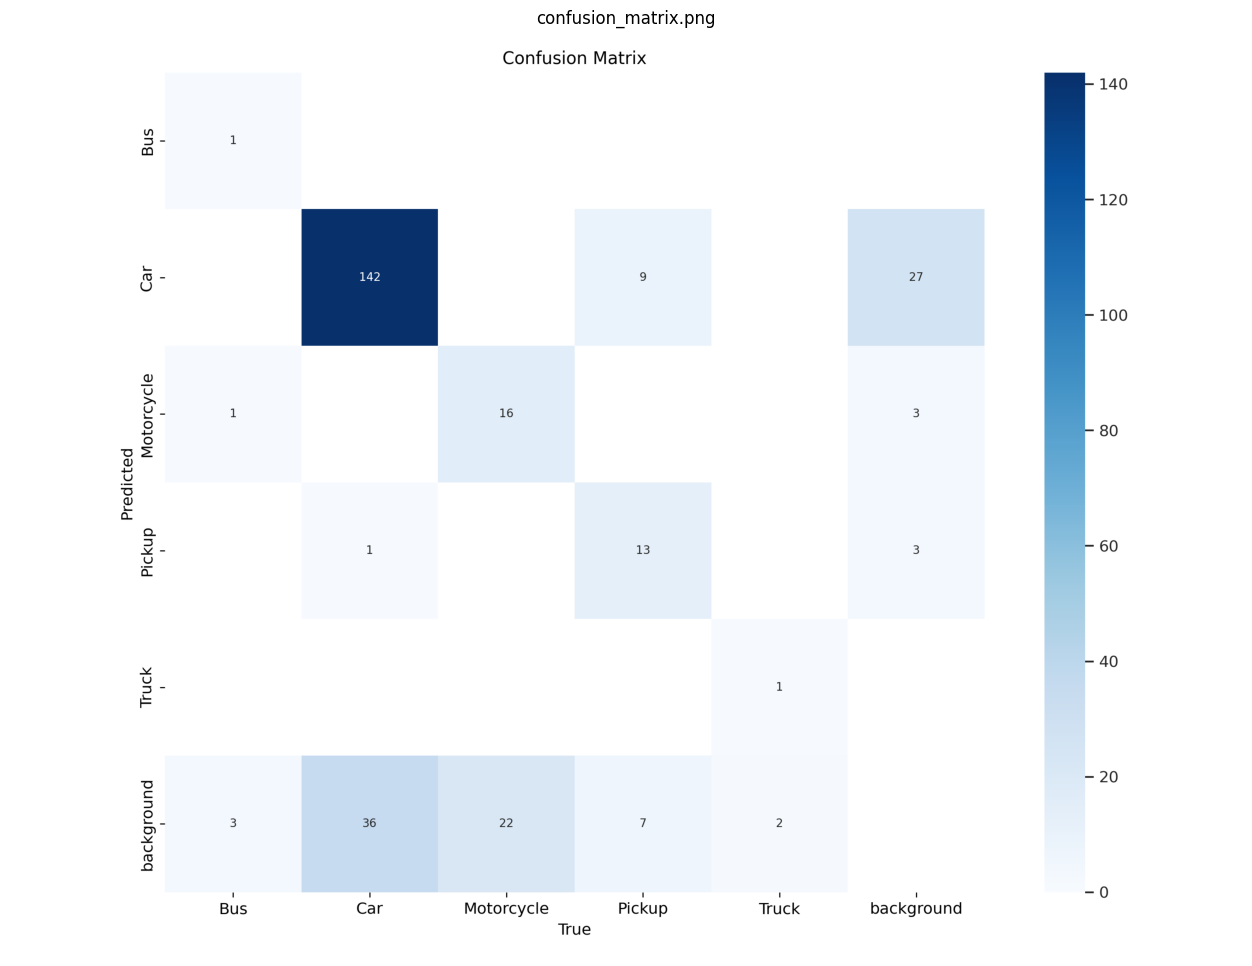

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Ensure the save directory path is valid and absolute
folder_path = str(metrics.save_dir)  # Convert to string if necessary

# List all image files in the directory
images = [file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg'))]

# Display the images
for image in images:
    img_path = os.path.join(folder_path, image)
    img = Image.open(img_path)
    plt.figure(figsize=(16, 12))
    plt.title(image)
    plt.imshow(img)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()



image 1/1 /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images/frame_9055_jpg.rf.067db6b83a7de9859840f6ca2484d373.jpg: 640x640 3 Motorcycles, 3 Pickups, 19.0ms
Speed: 2.4ms preprocess, 19.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


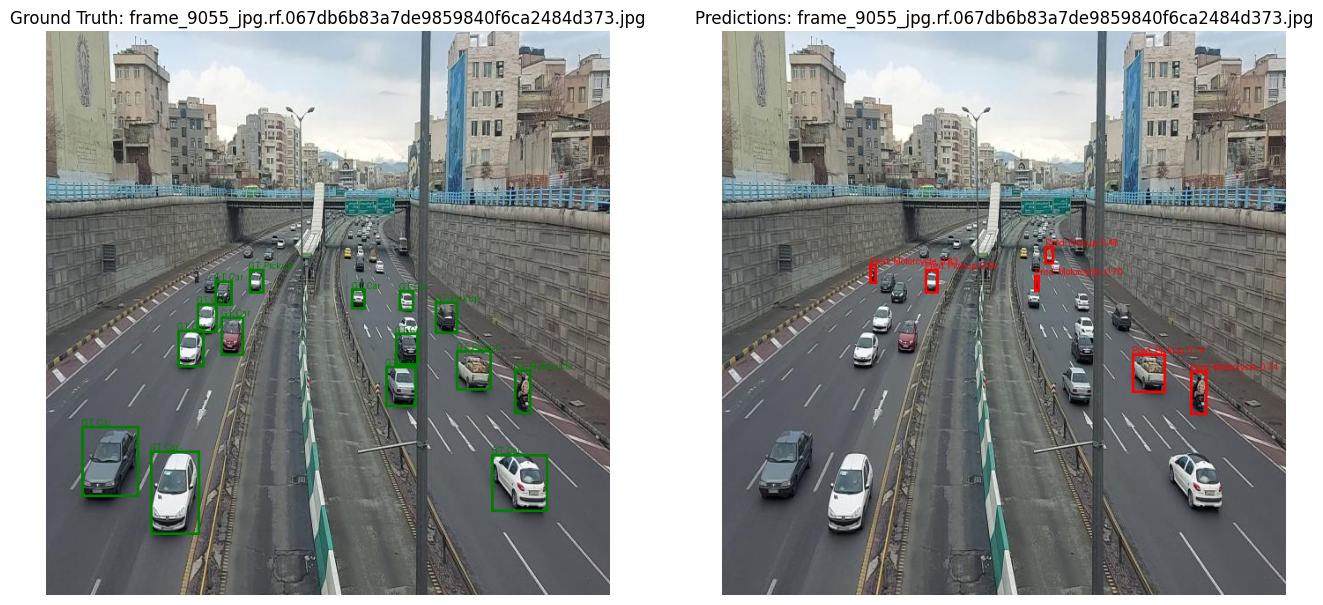


image 1/1 /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images/frame_7020_jpg.rf.2253566dc05fca6e0181a517bab14339.jpg: 640x640 1 Pickup, 27.6ms
Speed: 2.3ms preprocess, 27.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


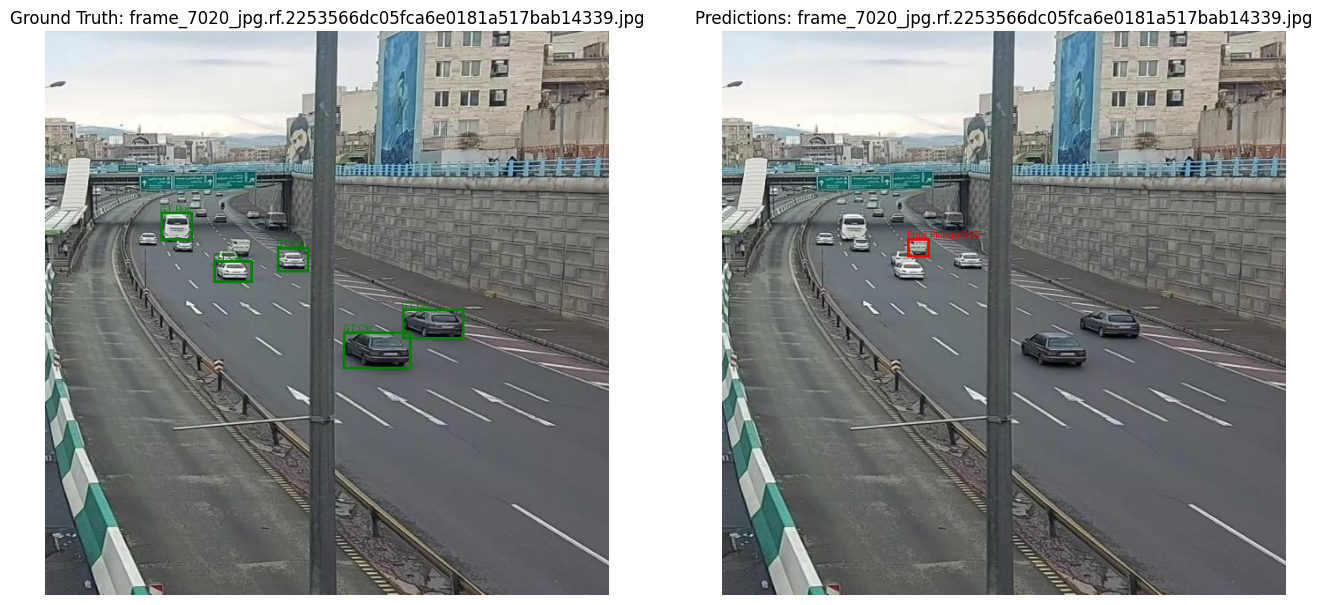


image 1/1 /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images/frame_1004_jpg.rf.a6f441255e54620ea11fb3cf34fc0a97.jpg: 640x640 7 Motorcycles, 3 Pickups, 18.8ms
Speed: 2.6ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


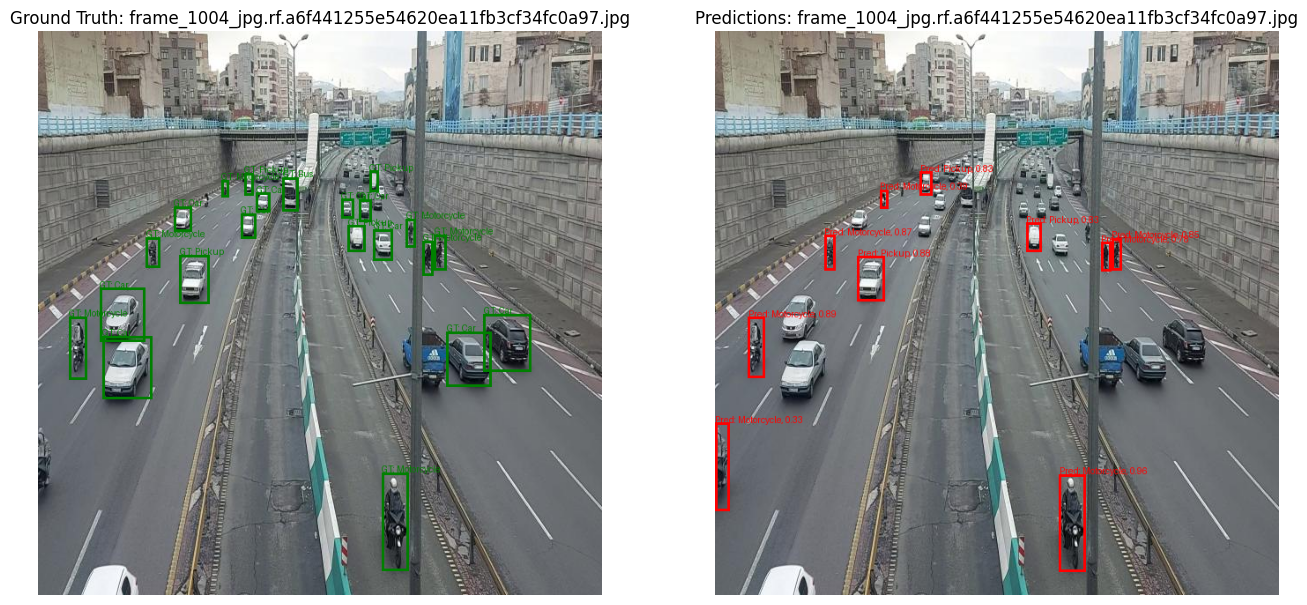

In [ ]:
import os
import random
import yaml
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ultralytics import YOLO

# Paths to the test images, labels, and data.yaml
test_images_path = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/images'  # Update if needed
test_labels_path = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/test/labels'  # Update if needed
data_yaml_path = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data.yaml'  # Path to data.yaml

# Load class names from data.yaml
with open(data_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']

# Get all test images
test_images = [file for file in os.listdir(test_images_path) if file.endswith(('.png', '.jpg'))]

random_images = random.sample(test_images, 3)

# Loop through the selected images
for random_image in random_images:
    image_path = os.path.join(test_images_path, random_image)
    label_path = os.path.join(test_labels_path, random_image.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Run the prediction
    results = model.predict(source=image_path, save=False, conf=0.25)  # Adjust conf threshold as needed
    predicted_boxes = results[0].boxes.xyxy.cpu().numpy()  # Get predicted bounding boxes (x_min, y_min, x_max, y_max)
    predicted_classes = results[0].boxes.cls.cpu().numpy()  # Get predicted class IDs
    predicted_scores = results[0].boxes.conf.cpu().numpy()  # Get confidence scores

    # Read the ground truth labels
    ground_truth_boxes = []
    ground_truth_classes = []
    with open(label_path, 'r') as file:
        for line in file.readlines():
            parts = line.strip().split()
            cls, x_center, y_center, width, height = map(float, parts)
            ground_truth_classes.append(int(cls))
            x_min = (x_center - width / 2) * Image.open(image_path).width
            y_min = (y_center - height / 2) * Image.open(image_path).height
            x_max = (x_center + width / 2) * Image.open(image_path).width
            y_max = (y_center + height / 2) * Image.open(image_path).height
            ground_truth_boxes.append([x_min, y_min, x_max, y_max])

    # Open the image
    image = Image.open(image_path)

    # Draw ground truth boxes
    image_with_gt = image.copy()
    draw_gt = ImageDraw.Draw(image_with_gt)
    for box, cls in zip(ground_truth_boxes, ground_truth_classes):
        label = class_names[cls]  # Map class index to label name
        draw_gt.rectangle(box, outline="green", width=3)
        draw_gt.text((box[0], box[1] - 10), f"GT: {label}", fill="green")

    # Draw predicted boxes
    image_with_pred = image.copy()
    draw_pred = ImageDraw.Draw(image_with_pred)
    for box, cls, score in zip(predicted_boxes, predicted_classes, predicted_scores):
        label = class_names[int(cls)]  # Map class index to label name
        draw_pred.rectangle(box, outline="red", width=3)
        draw_pred.text((box[0], box[1] - 10), f"Pred: {label}, {score:.2f}", fill="red")

    # Display images
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title(f"Ground Truth: {random_image}")
    plt.imshow(image_with_gt)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Predictions: {random_image}")
    plt.imshow(image_with_pred)
    plt.axis('off')

    plt.show()

In [ ]:
import albumentations
print(albumentations.__version__)

1.4.21


In [ ]:
import os
import cv2  # For image processing
import random
import numpy as np
from albumentations import Compose, Rotate, Resize, BboxParams
import shutil

In [ ]:
def read_yolo_labels(label_file):
    """Reads bounding boxes and classes from a YOLO label file."""
    with open(label_file, "r") as f:
        lines = f.readlines()
    bboxes = []
    for line in lines:
        cls, x, y, w, h = map(float, line.strip().split())
        bboxes.append([x, y, w, h, int(cls)])  # YOLO bbox format
    return bboxes

def write_yolo_labels(label_file, bboxes):
    """Writes bounding boxes and classes to a YOLO label file."""
    with open(label_file, "w") as f:
        for bbox in bboxes:
            cls, x, y, w, h = bbox[4], bbox[0], bbox[1], bbox[2], bbox[3]
            f.write(f"{cls} {x} {y} {w} {h}\n")

In [ ]:
def get_augmentation_pipeline():
    """Defines the augmentation pipeline."""
    return Compose(
        [
            Rotate(limit=45, p=0.5),  # Rotate images up to ±45 degrees
            Resize(640, 640)         # Resize images to YOLO standard input size
        ],
        bbox_params=BboxParams(format='yolo', label_fields=['class_labels'])
    )

In [ ]:
def apply_cutmix(image1, bboxes1, labels1, image2, bboxes2, labels2):
    """Applies CutMix by merging two images."""
    h, w, _ = image1.shape

    # Define random rectangle for CutMix
    cx = random.randint(0, w)
    cy = random.randint(0, h)
    cut_w = random.randint(w // 4, w // 2)
    cut_h = random.randint(h // 4, h // 2)

    x1 = max(0, cx - cut_w // 2)
    y1 = max(0, cy - cut_h // 2)
    x2 = min(w, cx + cut_w // 2)
    y2 = min(h, cy + cut_h // 2)

    # Overlay rectangle from image2 onto image1
    image1[y1:y2, x1:x2, :] = image2[y1:y2, x1:x2, :]

    # Combine bounding boxes and labels
    new_bboxes = bboxes1 + bboxes2
    new_labels = labels1 + labels2

    return image1, new_bboxes, new_labels

In [ ]:
def augment_and_save(image_file1, label_file1, image_file2, label_file2, augmentation_pipeline, output_image_dir, output_label_dir):
    # Load images and labels
    image1 = cv2.imread(image_file1)
    bboxes1 = read_yolo_labels(label_file1)

    image2 = cv2.imread(image_file2)
    bboxes2 = read_yolo_labels(label_file2)

    # Apply CutMix
    combined_image, combined_bboxes, combined_labels = apply_cutmix(image1, bboxes1, [0]*len(bboxes1), image2, bboxes2, [0]*len(bboxes2))

    # Apply rotation
    augmented = augmentation_pipeline(image=combined_image, bboxes=combined_bboxes, class_labels=combined_labels)
    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']

    # Save augmented data
    cv2.imwrite(os.path.join(output_image_dir, os.path.basename(image_file1)), augmented_image)
    write_yolo_labels(os.path.join(output_label_dir, os.path.basename(label_file1)), augmented_bboxes)

In [ ]:
# Paths for original and augmented data
train_images_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/images'
train_labels_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/labels'
augmented_images_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/augmented_images'
augmented_labels_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/augmented_labels'

# Paths for combined dataset
combined_images_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images'
combined_labels_dir = '/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_labels'

# Create combined directories if they don't exist
os.makedirs(augmented_images_dir, exist_ok=True)
os.makedirs(augmented_labels_dir, exist_ok=True)
os.makedirs(combined_images_dir, exist_ok=True)
os.makedirs(combined_labels_dir, exist_ok=True)



In [ ]:
# Initialize augmentation pipeline
augmentation_pipeline = get_augmentation_pipeline()

# List image and label files
image_files = sorted(os.listdir(train_images_dir))
label_files = sorted(os.listdir(train_labels_dir))

# Apply augmentation for each pair of images
for i in range(0, len(image_files) - 1, 2):  # Process in pairs
    augment_and_save(
        os.path.join(train_images_dir, image_files[i]),
        os.path.join(train_labels_dir, label_files[i]),
        os.path.join(train_images_dir, image_files[i+1]),
        os.path.join(train_labels_dir, label_files[i+1]),
        augmentation_pipeline,
        augmented_images_dir,
        augmented_labels_dir
    )

In [ ]:
for img_file in os.listdir(train_images_dir):
    shutil.copy(
        os.path.join(train_images_dir, img_file),
        os.path.join(combined_images_dir, img_file)
    )

for lbl_file in os.listdir(train_labels_dir):
    shutil.copy(
        os.path.join(train_labels_dir, lbl_file),
        os.path.join(combined_labels_dir, lbl_file)
    )

In [ ]:
for img_file in os.listdir(augmented_images_dir):
    shutil.copy(
        os.path.join(augmented_images_dir, img_file),
        os.path.join(combined_images_dir, img_file)
    )

for lbl_file in os.listdir(augmented_labels_dir):
    shutil.copy(
        os.path.join(augmented_labels_dir, lbl_file),
        os.path.join(combined_labels_dir, lbl_file)
    )

In [ ]:
model = YOLO('yolov9t.pt')

results = model.train(
    data='/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data_augmented.yaml',
    epochs=200,
    batch=32,
    verbose=True
)

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov9t.pt, data=/content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/data_augmented.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

train: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images... 0 images, 136 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 316.61it/s]

train: WARNING ⚠️ No labels found in /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images.cache
WARNING ⚠️ No labels found in /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/train/combined_images.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/My Drive/dataset/Apply_Grayscale/Apply_Grayscale/Vehicles_Detection.v9i.yolov9/valid/labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.32G          0        218          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         28        563     0.0012      0.121    0.00616     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       5.3G          0        218          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all         28        563    0.00108       0.12    0.00986    0.00332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.32G          0      214.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         28        563   0.000974     0.0845    0.00111   0.000483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.32G          0      208.3          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.73it/s]

                   all         28        563   0.000413     0.0568   0.000691    0.00029



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.32G          0      200.1          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         28        563   0.000418     0.0534   0.000339   8.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.32G          0      189.7          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         28        563   0.000432     0.0534    0.00083   0.000144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.32G          0      180.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all         28        563   0.000335     0.0505   0.000383   7.87e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.32G          0        175          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


                   all         28        563   0.000192       0.05   0.000245   3.51e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.32G          0      170.2          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.68it/s]

                   all         28        563   9.55e-05      0.025    6.2e-05    1.2e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.32G          0      167.4          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]

                   all         28        563   0.000195       0.05   0.000149   2.25e-05


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       5.5G          0      163.8          0          0        640: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         28        563   0.000172       0.05   0.000116   2.91e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      5.32G          0      161.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         28        563   0.000142       0.05   0.000108   1.08e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.32G          0      160.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         28        563   0.000142       0.05   0.000108   1.08e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      5.32G          0      158.1          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         28        563   0.000117       0.05   0.000146   1.46e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.32G          0      156.6          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         28        563   0.000154     0.0284   8.78e-05   8.78e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.32G          0      155.1          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         28        563   0.000294     0.0505   0.000185   2.99e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.32G          0      153.8          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         28        563    0.00039     0.0539   0.000233   4.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      5.32G          0      152.7          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         28        563   0.000317     0.0505   0.000188   3.55e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.32G          0      151.9          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         28        563   0.000322     0.0505   0.000192   3.04e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      5.32G          0      152.5          0          0        640: 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all         28        563    0.00036     0.0505   0.000208    3.1e-05



20 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 4.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 4.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv9t summary (fused): 486 layers, 1,971,759 parameters, 0 gradients, 7.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]


                   all         28        563    0.00108       0.12     0.0083    0.00286
                   Bus          6          6   0.000709      0.167     0.0333    0.00999
                   Car         23        398    0.00139    0.00754   0.000703   0.000211
            Motorcycle         18         92          0          0          0          0
                Pickup         22         59    0.00239     0.0508     0.0021     0.0017
                 Truck          8          8   0.000929      0.375    0.00538    0.00239
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2
